# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Mini-Project : Policy Iteration in Frozen lake enviroment

## Learning Objectives

At the end of the mini project, you will be able to

* understand the Gym enviroment
* use of policy iteration.


**Packages used:**  
* `GYM` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization



In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Environment

In this example we are using Frozen Lake environment. The Frozen Lake environment is a simple but classic reinforcement learning environment from the OpenAI Gym library. It is a text-based environment in which the agent starts at a starting position on a frozen lake and must navigate to the goal position without falling into any holes. The lake can be slippery, so the agent may not always move in the intended direction.

#### Q1 Get the transition probabilities and reward function for Frozen Lake environment(3 marks)

In [2]:
# For testing the output of policy iteration (you can write your own code).
def testPolicy(policy, trials=100):
    """
    Get the average rate of successful episodes over given number of trials
    : param policy: function, a deterministic policy function
    : param trials: int, number of trials
    : return: float, average success rate
    """
    env = gym.make('FrozenLake-v1')
    env.reset()
    success = 0

    for _ in range(trials):
        done = False
        state = env.reset()
        while not done:
            action = policy[state]
            state, _, done, _ = env.step(action)
            if state == 15:
                success += 1

    avg_success_rate = success / trials
    return avg_success_rate

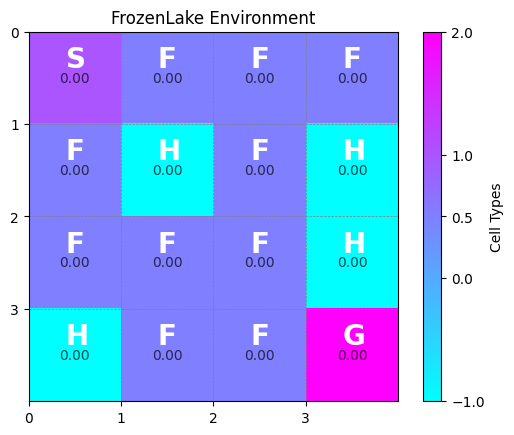


Action space: Discrete(4)
Observation space: Discrete(16)

Action 0: ◀️ LEFT
Action 1: ⬇️ DOWN
Action 2: ▶️ RIGHT
Action 3: ⬆️ UP

State 0, Action 0:
  Next State: 0, Probability: 0.33, Reward: 0.0, Terminal: False
  Next State: 0, Probability: 0.33, Reward: 0.0, Terminal: False
  Next State: 4, Probability: 0.33, Reward: 0.0, Terminal: False
----------------------------------------------------------------
State 0, Action 1:
  Next State: 0, Probability: 0.33, Reward: 0.0, Terminal: False
  Next State: 4, Probability: 0.33, Reward: 0.0, Terminal: False
  Next State: 1, Probability: 0.33, Reward: 0.0, Terminal: False
----------------------------------------------------------------
State 0, Action 2:
  Next State: 4, Probability: 0.33, Reward: 0.0, Terminal: False
  Next State: 1, Probability: 0.33, Reward: 0.0, Terminal: False
  Next State: 0, Probability: 0.33, Reward: 0.0, Terminal: False
----------------------------------------------------------------
State 0, Action 3:
  Next State

(array([[[0.66666667, 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.66666667, 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ]],
 
        [[0.33333333, 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 0.        , 0.33333333, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.33333333, 0.33333333, ..., 0.        ,
          0.        , 0.        ],
         [0.33333333, 0.33333333, 0.33333333, ..., 0.        ,
          0.        , 0.        ]],
 
        [[0.        , 0.33333333, 0.33333333, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.33333333, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.  

In [4]:
# YOUR CODE HERE

def get_and_print_transitions(env):

    num_states = env.observation_space.n
    num_actions = env.action_space.n
    # Initialize arrays for transition probabilities and rewards
    transition_probabilities = np.zeros((num_states, num_actions, num_states))
    rewards = np.zeros((num_states, num_actions, num_states))
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            transitions = env.P[s][a]
            print(f"State {s}, Action {a}:")
            for prob, next_state, reward, is_terminal in transitions:
                transition_probabilities[s, a, next_state] += prob
                rewards[s, a, next_state] = reward
                print(f"  Next State: {next_state}, Probability: {prob:.2f}, Reward: {reward}, Terminal: {is_terminal}")
            print("----------------------------------------------------------------")  # Add a horizontal line between state-action pairs
    return transition_probabilities, rewards

def plot_frozen_lake_environment():
    # Create the Frozen Lake environment (non-slippery version)
    env = gym.make("FrozenLake-v1", is_slippery=False)

    # Get the grid size
    grid_size = env.nrow

    # Initialize an empty grid to represent the environment
    grid = np.zeros((grid_size, grid_size))

    # Set values for different cell types
    for row in range(grid_size):
        for col in range(grid_size):
            state = row * grid_size + col
            if env.desc[row, col] == b"S":
                grid[row, col] = 1  # Start (S)
            elif env.desc[row, col] == b"F":
                grid[row, col] = 0.5  # Frozen (F)
            elif env.desc[row, col] == b"H":
                grid[row, col] = -1  # Hole (H)
            elif env.desc[row, col] == b"G":
                grid[row, col] = 2  # Goal (G)

    # Plot the grid
    plt.imshow(grid, cmap="cool", origin="upper", extent=[0, grid_size, grid_size, 0])
    plt.colorbar(ticks=[-1, 0, 0.5, 1, 2], label="Cell Types")
    plt.title("FrozenLake Environment")
    plt.xticks(np.arange(grid_size))
    plt.yticks(np.arange(grid_size))
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    # Annotate cell values (rewards) without overlapping labels
    for row in range(grid_size):
        for col in range(grid_size):
            plt.text(col + 0.5, row + 0.5, f"{env.P[state][0][0][2]:.2f}", color="black",
                     ha="center", va="center", fontsize=10, alpha=0.7)

            # Add labels for cells
            if env.desc[row, col] == b"S":
                plt.text(col + 0.4, row + 0.45, "S", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")
            elif env.desc[row, col] == b"F":
                plt.text(col + 0.4, row + 0.45, "F", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")
            elif env.desc[row, col] == b"H":
                plt.text(col + 0.4, row + 0.45, "H", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")
            elif env.desc[row, col] == b"G":
                plt.text(col + 0.4, row + 0.45, "G", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")


    plt.show()

# Call the function to plot the enhanced Frozen Lake environment
plot_frozen_lake_environment()

print("")


env = gym.make("FrozenLake-v1")
# Print action space and observation space
print(f"Action space: {env.action_space}")
print(f"Observation space: {env.observation_space}")
print("")

# Print the action symbols
# Define action symbols
action_symbols = {
    0: "◀️ LEFT",
    1: "⬇️ DOWN",
    2: "▶️ RIGHT",
    3: "⬆️ UP"
}
for action, symbol in action_symbols.items():
    print(f"Action {action}: {symbol}")
print("")

get_and_print_transitions(env)

### Policy Iteration

#### Policy:
 A policy is the thought process behind picking an action. In practice, it’s a probability distribution assigned to the set of actions. Highly rewarding actions will have a high probability and vice versa. If an action has a low probability, it doesn’t mean it won’t be picked at all. It’s just less likely to be picked.

 Policy iteration is a dynamic programming algorithm for finding the optimal policy in a Markov decision process (MDP). It works by iteratively evaluating and improving the policy until convergence.

**Policy evaluation**

Policy evaluation takes a policy as input and computes the expected value of each state under that policy. This is done by recursively calculating the expected value of each state, taking into account the transition probabilities and rewards of the MDP.

**Policy improvement**

Policy improvement takes the value function as input and computes a new policy that is guaranteed to be at least as good as the old policy. This is done by choosing the action in each state that leads to the highest expected value.

**Policy iteration algorithm**

The policy iteration algorithm works as follows:

1. **Initialize the value function.** This can be done arbitrarily.
2. **Evaluate the policy.** Use the policy evaluation algorithm to compute the expected value of each state under the current policy.
3. **Improve the policy.** Use the policy improvement algorithm to compute a new policy that is guaranteed to be at least as good as the old policy.
4. **Repeat steps 2 and 3 until the policy converges.**

**Convergence**

The policy iteration algorithm is guaranteed to converge to the optimal policy in a finite number of iterations. This is because a finite MDP has only a finite number of policies, and each policy iteration either improves the policy or leaves it unchanged.

**Example**

Suppose we have the following MDP:

```
State | Action | Transition probability | Reward
-------|--------|-------------------|-------
S1   | A     | 0.5, 0.5         | 1
S1   | B     | 0.5, 0.5         | 0
S2   | A     | 1             | 10
S2   | B     | 1             | 0
```

The optimal policy is to always go to state S2, regardless of the current state. This is because state S2 has a higher expected reward than state S1.

We can use policy iteration to find the optimal policy as follows:

1. **Initialize the value function.** We can initialize the value function to all zeros.
2. **Evaluate the policy.** We use the policy evaluation algorithm to compute the expected value of each state under the current policy.

```
State | Value
-------|-------
S1   | 0.5
S2   | 10
```

3. **Improve the policy.** We use the policy improvement algorithm to compute a new policy that is guaranteed to be at least as good as the old policy.

```
State | Action
-------|--------
S1   | A
S2   | A
```

4. **Repeat steps 2 and 3 until the policy converges.**

We can see that the policy has converged, since the new policy is the same as the old policy. Therefore, the optimal policy is to always go to state S2, regardless of the current state.

**Conclusion**

Policy iteration is a powerful algorithm for finding the optimal policy in an MDP. It is guaranteed to converge to the optimal policy in a finite number of iterations. Policy iteration is often used in reinforcement learning to train agents to learn how to behave optimally in complex environments.

#### Q2 Write the code for policy evaluation(2 marks)

In [ ]:
# YOUR CODE HERE

def policy_evaluation(env, policy, gamma=0.99, theta=1e-6, max_iterations=1000):
    # Initialize state values (V) arbitrarily
    V = np.zeros(env.observation_space.n)

    for _ in range(max_iterations):
        delta = 0  # Initialize the maximum change in V
        for s in range(env.observation_space.n):
            v = V[s]  # Store the old value for comparison
            action = policy[s]
            transitions = env.P[s][action]

            # Update V using Bellman equation
            V[s] = sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in transitions)

            delta = max(delta, abs(v - V[s]))  # Update delta

        if delta < theta:
            break

    return V

#Example
random_policy = np.random.randint(env.action_space.n, size=env.observation_space.n)  # Random policy
V_values = policy_evaluation(env, random_policy)

print("State Values (V-values):")
for s, value in enumerate(V_values):
    print(f"State {s}: {value:.4f}")

State Values (V-values):
State 0: 0.0000
State 1: 0.0000
State 2: 0.0935
State 3: 0.0908
State 4: 0.0166
State 5: 0.0000
State 6: 0.0991
State 7: 0.0000
State 8: 0.0338
State 9: 0.0686
State 10: 0.2068
State 11: 0.0000
State 12: 0.0000
State 13: 0.1741
State 14: 0.4591
State 15: 0.0000


#### Q3 Write the code for policy improvement(2 marks)

In [ ]:
# YOUR CODE HERE

def policy_improvement(env, V_values, gamma=0.99):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    # Initialize an empty policy
    policy = np.zeros(num_states, dtype=int)

    while True:
        policy_stable = True
        for s in range(num_states):
            old_action = policy[s]
            q_values = np.zeros(num_actions)
            for a in range(num_actions):
                transitions = env.P[s][a]
                q_values[a] = sum(prob * (reward + gamma * V_values[next_state]) for prob, next_state, reward, _ in transitions)

            # Choose the action that maximizes the Q-value
            new_action = np.argmax(q_values)
            if old_action != new_action:
                policy_stable = False
                policy[s] = new_action

        # If the policy is stable, we can break out of the loop
        if policy_stable:
            break

    return policy

#Example
random_policy = np.random.randint(env.action_space.n, size=env.observation_space.n)  # Random initial policy
V_values = policy_evaluation(env, random_policy)  # Compute V-values using policy evaluation
improved_policy = policy_improvement(env, V_values)

print("Improved Policy (Action indices):", improved_policy)

Improved Policy (Action indices): [3 3 2 3 0 0 0 0 3 1 0 0 0 2 2 0]


#### Q4 Write the code for policy iteration(2marks)

In [ ]:
# YOUR CODE HERE
def policy_evaluation(policy, env, V_values, gamma=0.99, theta=0.001):
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = V_values[s]
            action = policy[s]
            V_values[s] = sum(prob * (reward + gamma * V_values[next_state])
                              for prob, next_state, reward, _ in env.P[s][action])
            delta = max(delta, abs(v - V_values[s]))
        if delta < theta:
            break
    return V_values

def policy_improvement(env, V_values, gamma=0.99):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    # Initialize an empty policy
    policy = np.zeros(num_states, dtype=int)

    while True:
        policy_stable = True
        for s in range(num_states):
            old_action = policy[s]
            q_values = np.zeros(num_actions)
            for a in range(num_actions):
                transitions = env.P[s][a]
                q_values[a] = sum(prob * (reward + gamma * V_values[next_state]) for prob, next_state, reward, _ in transitions)

            # Choose the action that maximizes the Q-value
            new_action = np.argmax(q_values)
            if old_action != new_action:
                policy_stable = False
                policy[s] = new_action

        # If the policy is stable, we can break out of the loop
        if policy_stable:
            break

    return policy

def policy_iteration(env, gamma=0.99, theta=0.001):
    num_states = env.observation_space.n
    # Initialize a random policy and a zero value function
    policy = np.random.choice(env.action_space.n, size=(num_states,))
    V_values = np.zeros(num_states)

    while True:
        # Policy Evaluation
        V_values = policy_evaluation(policy, env, V_values, gamma, theta)
        # Policy Improvement
        new_policy = policy_improvement(env, V_values, gamma)

        # Check if the policy has changed
        if np.array_equal(policy, new_policy):
            break
        policy = new_policy

    return policy, V_values

optimal_policy, optimal_values = policy_iteration(env)
print("Optimal policy:", optimal_policy)
print("Optimal value function:", optimal_values)

Optimal policy: [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
Optimal value function: [0.53328365 0.48623358 0.45542418 0.44020246 0.55061799 0.
 0.35181148 0.         0.58531628 0.63830172 0.61089704 0.
 0.         0.7384251  0.8611733  0.        ]


#### Q5 Apply policy iteration in Frozen Lake environment(1 marks)

Optimal policy: [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


Optimal value function: [0.53335584 0.48615298 0.45522665 0.43994342 0.55067008 0.
 0.35173641 0.         0.58534152 0.63829916 0.61087086 0.
 0.         0.73842269 0.86117194 0.        ]

 


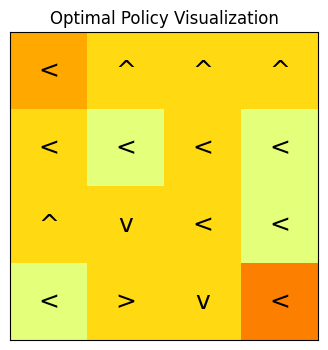

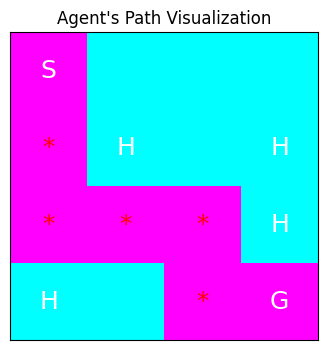

In [ ]:
# YOUR CODE HERE
'''def plot_policy(policy, env):
    # Create a grid to visualize the policy
    grid = np.zeros((env.nrow, env.ncol), dtype=int)
    grid_policy = np.zeros((env.nrow, env.ncol), dtype=int)

    for s in range(env.observation_space.n):
        row, col = divmod(s, env.ncol)  # Convert state index to row and column
        grid[row, col] = policy[s]
        grid_policy[row, col] = policy[s]
        print(grid_policy[row, col])

    print(grid_policy)
    # Define action labels
    action_labels = ["←", "↓", "→", "↑"]

    print(action_labels[0])

    # Plot the grid
   ''' '''plt.figure(figsize=(1, 1))  # Smaller figure size
    for i in range(env.nrow):
        for j in range(env.ncol):
            plt.text(j, i, action_labels[grid[i, j]], ha='center', va='center', fontsize=12)''''''
    grid_size = env.nrow
        # Set values for different cell types
    for row in range(grid_size):
        for col in range(grid_size):
            state = row * grid_size + col
            if env.desc[row, col] == b"S":
                grid[row, col] = 1  # Start (S)
            elif env.desc[row, col] == b"F":
                grid[row, col] = 0.5  # Frozen (F)
            elif env.desc[row, col] == b"H":
                grid[row, col] = -1  # Hole (H)
            elif env.desc[row, col] == b"G":
                grid[row, col] = 2  # Goal (G)

    for row in range(grid_size):
        for col in range(grid_size):
            print(grid_policy[row,col])
            print(action_labels[grid_policy[row, col]])
    # Plot the grid
    plt.imshow(grid, cmap="cool", origin="upper", extent=[0, grid_size, grid_size, 0])
    plt.colorbar(ticks=[-1, 0, 0.5, 1, 2], label="Cell Types")
    plt.title("Optimal Policy (Action indices)")
    plt.xticks(np.arange(grid_size))
    plt.yticks(np.arange(grid_size))
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    # Annotate cell values (rewards) without overlapping labels
    for row in range(grid_size):
        for col in range(grid_size):
            plt.text(col + 0.5, row + 0.5, action_labels[grid_policy[row, col]], ha='center', va='center', fontsize=12)

            # Add labels for cells
            if env.desc[row, col] == b"S":
                plt.text(col + 0.4, row + 0.45, "S", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")
            elif env.desc[row, col] == b"F":
                plt.text(col + 0.4, row + 0.45, "F", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")
            elif env.desc[row, col] == b"H":
                plt.text(col + 0.4, row + 0.45, "H", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")
            elif env.desc[row, col] == b"G":
                plt.text(col + 0.4, row + 0.45, "G", color="white", ha="left", va="bottom", fontsize=20, fontweight="bold")

    plt.show()'''


def plot_policy(policy, env):
    # Create a numeric grid based on the environment description
    numeric_grid = np.zeros_like(env.desc, dtype=np.float32)

    # Define mappings from the environment description to numeric values
    mapping = {b'S': 1.0,  # Start
               b'F': 0.0,  # Frozen
               b'H': -1.0, # Hole
               b'G': 2.0}  # Goal

    # Apply the mapping to the numeric grid
    for k, v in mapping.items():
        numeric_grid[env.desc == k] = v

    # Define action labels
    action_labels = ['<', 'v', '>', '^']  # Left, Down, Right, Up

    # Map the policy to the grid
    grid_policy = np.array([action_labels[action] for action in policy]).reshape(env.nrow, env.ncol)

    # Plot the grid
    plt.figure(figsize=(env.ncol, env.nrow))
    plt.imshow(numeric_grid, cmap="Wistia", interpolation='nearest')
    for row in range(env.nrow):
        for col in range(env.ncol):
            plt.text(col, row, grid_policy[row, col],
                     ha='center', va='center', fontsize=18, color='black')

    plt.title("Optimal Policy Visualization")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def simulate_agent(env, policy, start_state):
    env.reset()  # Reset the environment
    state = start_state
    done = False
    path = [state]

    while not done:
        action = policy[state]
        state, _, done, _ = env.step(action)
        path.append(state)
        if done:
            break
    return path

def visualize_path(env, path):
    # Create a grid to visualize the path
    grid = np.zeros((env.nrow, env.ncol))

    # Mark the path on the grid
    for state in path:
        row, col = divmod(state, env.ncol)
        grid[row, col] = 1  # Mark the agent's path

    # Plot the grid
    plt.figure(figsize=(env.ncol, env.nrow))
    plt.imshow(grid, cmap="cool", interpolation='nearest')
    plt.title("Agent's Path Visualization")
    plt.xticks([])
    plt.yticks([])

    # Mark the start, goal, and holes
    for row in range(env.nrow):
        for col in range(env.ncol):
            if env.desc[row][col] == b'S':
                plt.text(col, row, 'S', ha='center', va='center', fontsize=18, color='white')
            elif env.desc[row][col] == b'G':
                plt.text(col, row, 'G', ha='center', va='center', fontsize=18, color='white')
            elif env.desc[row][col] == b'H':
                plt.text(col, row, 'H', ha='center', va='center', fontsize=18, color='white')
            elif env.desc[row][col] == b'F':
                if grid[row, col] == 1:
                    plt.text(col, row, '*', ha='center', va='center', fontsize=18, color='red')

    plt.show()



env = gym.make("FrozenLake-v1")
optimal_policy, optimal_values = policy_iteration(env)
print("Optimal policy:", optimal_policy)
print("\n")
print("Optimal value function:", optimal_values)
print("\n ")

# Plot the policy
plot_policy(optimal_policy, env)

# Define the start state
start_state = 0

# Simulate the agent's journey using the optimal policy from the given start state
path = simulate_agent(env, optimal_policy, start_state)

# Visualize the agent's path with arrows indicating the direction of movement
visualize_path(env, path)